https://medium.com/@ali.soleymani.co/stop-using-grid-search-or-random-search-for-hyperparameter-tuning-c2468a2ff887

In [1]:
pip install Unidecode pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 51.9 MB/s eta 0:00:0

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import pickle

from unidecode import unidecode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
cd drive/MyDrive/Code/

/content/drive/MyDrive/Code


In [5]:
sns.set_theme(style='whitegrid')
sns.set_color_codes('pastel')

In [6]:
dados_mun = pd.read_csv('Municipios/dadosdemograficos_RS.csv', sep=';')
dados_srag = pd.read_pickle('dados_srag.pickle')
dados_sivep = pd.read_pickle('dados_sivep.pickle')

In [7]:
dados_mun = dados_mun.fillna(0)
dados_mun['municipio'] = dados_mun['municipio'].str.lower()
dados_mun['municipio'] = dados_mun['municipio'].apply(unidecode)

dados_mun['municipio'] = dados_mun['municipio'].replace("sant'ana do livramento", 'santana do livramento')

In [8]:
dados_sivep['municipionotificacao'] = dados_sivep['municipionotificacao'].str.lower()
dados_sivep['municipio'] = dados_sivep['municipio'].apply(unidecode)
dados_sivep['municipionotificacao'] = dados_sivep['municipionotificacao'].apply(unidecode)

dados_sivep['municipionotificacao'] = dados_sivep['municipionotificacao'].replace("sant'ana do livramento", 'santana do livramento')
dados_sivep['municipio'] = dados_sivep['municipio'].replace("sant'ana do livramento", 'santana do livramento')
# dados_sivep['sexo'] = dados_sivep['sexo'].replace('Feminino', 0)
# dados_sivep['sexo'] = dados_sivep['sexo'].replace('Masculino', 1)


# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Branca', 1)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Preta', 2)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Amarela', 3)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Parda', 4)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Indígena', 5)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Ignorado', 9)

In [9]:
dados_srag['municipio'] = dados_srag['municipio'].str.lower()
dados_srag['municipionotificacao'] = dados_srag['municipionotificacao'].str.lower()

dados_srag['sexo'] = dados_srag['sexo'].replace('F', 'Feminino')
dados_srag['sexo'] = dados_srag['sexo'].replace('M', 'Masculino')

dados_srag['racacor'] = dados_srag['racacor'].replace(1, 'Branca')
dados_srag['racacor'] = dados_srag['racacor'].replace(2, 'Preta')
dados_srag['racacor'] = dados_srag['racacor'].replace(3, 'Amarela')
dados_srag['racacor'] = dados_srag['racacor'].replace(4, 'Parda')
dados_srag['racacor'] = dados_srag['racacor'].replace(5, 'Indígena')
dados_srag['racacor'] = dados_srag['racacor'].replace(9, 'Ignorado')

In [10]:
dados_sivep = dados_sivep[dados_sivep['municipio'] != 'pinto bandeira']
dados_srag = dados_srag[dados_srag['municipio'] != 'pinto bandeira']
dados_sivep = dados_sivep[dados_sivep['municipionotificacao'] != 'pinto bandeira']
dados_srag = dados_srag[dados_srag['municipionotificacao'] != 'pinto bandeira']

In [11]:
municipio_le = LabelEncoder()
municipio_le.fit(dados_sivep['municipionotificacao'])

LabelEncoder()

In [12]:
dados_srag['municipio'] = municipio_le.transform(dados_srag['municipio'].values)
dados_srag['municipionotificacao'] = municipio_le.transform(dados_srag['municipionotificacao'].values)

dados_sivep['municipio'] = municipio_le.transform(dados_sivep['municipio'].values)
dados_sivep['municipionotificacao'] = municipio_le.transform(dados_sivep['municipionotificacao'].values)

dados_mun['municipio'] = municipio_le.transform(dados_mun['municipio'].values)

In [13]:
# Exporta a codificação dos municipios
output = open('municipios.pkl', 'wb')
pickle.dump(municipio_le, output)
output.close()

In [14]:
dados_covid = pd.concat([dados_sivep, dados_srag], ignore_index=True)

In [15]:
# Fonte https://infoms.saude.gov.br/extensions/covid-19_html/covid-19_html.html
print("O percentual de casos considerados para o treinamento em relação a\nquantidade de casos confirmados no Estado do RS para o ano de 2021 é:")
print("{:.2f}%".format((dados_covid.shape[0]/1507117)*100))

O percentual de casos considerados para o treinamento em relação a
quantidade de casos confirmados no Estado do RS para o ano de 2021 é:
71.08%


In [16]:
dados_covid

,municipionotificacao,sexo,racacor,municipio,datanotificacao,datainiciosintomas,idade,sem_not,faixa_etaria,dias_atenot,qnt_sintomas,qnt_comorbidades
0,355,Feminino,Branca,355,2021-01-11,2021-01-01,24.0,53,"(19, 39]",10.0,2,0
1,95,Masculino,Ignorado,95,2021-03-11,2021-03-02,45.0,9,"(39, 49]",9.0,1,0
2,324,Feminino,Branca,324,2021-06-10,2021-06-06,46.0,22,"(39, 49]",4.0,0,0
3,417,Masculino,Branca,417,2021-02-16,2021-02-13,32.0,6,"(19, 39]",3.0,3,0
4,340,Feminino,Preta,340,2021-04-01,2021-03-13,23.0,10,"(19, 39]",19.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1071202,324,Masculino,Branca,324,2021-09-12,2021-09-06,84.0,36,"(79, 140]",6.0,3,1
1071203,124,Masculino,Branca,124,2021-09-15,2021-09-07,65.0,36,"(59, 69]",7.0,4,2
1071204,201,Masculino,Branca,201,2021-12-27,2021-12-20,64.0,51,"(59, 69]",7.0,7,0
1071205,304,Masculino,Branca,304,2021-09-23,2021-09-19,51.0,38,"(49, 59]",4.0,7,1


In [17]:
# cria uma coluna para identificar a quantidade de pessoas com ao menos uma comorbidade
dados_covid['comorbidade'] = (dados_covid['qnt_comorbidades'] > 0).astype(int)

# faz o onehot encoding que vai auxiliar para criar a contagem por cada categoria
dados_onehot = pd.get_dummies(dados_covid, columns=['sexo', 'racacor','comorbidade', 'faixa_etaria'])

# deleta as colunas que nao são necessárias por agora
dados_onehot = dados_onehot.drop(['municipionotificacao', 'datanotificacao', 'datainiciosintomas', 'idade', 'dias_atenot', 'qnt_sintomas', 'qnt_comorbidades'], axis=1)

In [18]:
dados_onehot.sort_values(['municipio', 'sem_not'])

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]"
17983,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
93327,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
115435,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
824473,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
776351,0,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897623,495,53,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
897742,495,53,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
909784,495,53,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
925932,495,53,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [19]:
# faz a contagem usando como chave a semana de notificacao e o municipio
dados_group = dados_onehot.groupby(['sem_not', 'municipio'], as_index = False).sum()

In [20]:
dados_group

,sem_not,municipio,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]"
0,1,0,2,2,0,4,0,0,0,0,0,3,1,1,2,1,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,2,21,21,0,35,4,0,0,3,0,36,6,4,14,10,4,0,0,0
3,1,3,11,7,0,17,0,0,0,1,0,18,0,1,9,7,0,0,0,0
4,1,4,0,2,0,1,0,0,0,1,0,2,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22483,53,491,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
22484,53,492,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
22485,53,493,6,3,0,8,1,0,0,0,0,9,0,3,1,3,0,0,0,0
22486,53,494,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [21]:
# TODO idh, densidade demografica, pib, ...
dados_mun

,municipio,homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades
0,0,2303,2091,3533,338,33.0,489,1.0,0.0,1059,3335.0,496
1,1,1879,1843,3085,48,6.0,344,239.0,0.0,1447,2275.0,371
2,2,8349,8373,14593,517,75.0,1534,3.0,0.0,6889,9833.0,1670
3,3,3585,3670,6229,120,10.0,868,28.0,0.0,4108,3147.0,679
4,4,3512,3533,5849,104,20.0,1071,1.0,0.0,2165,4880.0,532
...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,819,750,1449,12,4.0,104,0.0,0.0,463,1106.0,153
492,492,1395,1364,2507,59,14.0,177,2.0,0.0,965,1794.0,297
493,493,1794,1691,2768,162,37.0,517,1.0,0.0,669,2816.0,284
494,494,1406,1387,2696,34,1.0,62,0.0,0.0,1130,1663.0,316


In [22]:
# faz o merge com os dados demograficos do municipio e cria o conjunto de treino
X = pd.merge(left=dados_group, right=dados_mun, how='left', left_on='municipio', right_on='municipio')

In [23]:
# faz a contagem de casos por semana de notificacao para cada municipio
y = (X['sexo_Feminino'] + X['sexo_Masculino']).to_frame(name='casos')
y['municipio'] = X['municipio']
y['sem_not'] = X['sem_not']

# TODO
# Considerar os casos das semanas anteriores
# Pode auxiliar
# E olhar pro passado pode :)

In [24]:
# TODO 
# separa 70% para treinamento e 30% para teste
# essa metodologia pode ser melhorada considerando 70% das semanas

qnt = int(X.shape[0] * 0.70)
print("Foram considerados: ", qnt, "registros para o treinamento")

print("Foram considerados: ", X.shape[0] - qnt, "registros para o teste")

X_treino = X.iloc[:qnt, :]
X_teste = X.iloc[qnt:, :]

y_treino = y.iloc[:qnt, :]
y_teste = y.iloc[qnt:, :]

Foram considerados:  15741 registros para o treinamento
Foram considerados:  6747 registros para o teste


In [25]:
y[y['casos']== y['casos'].max()]

,casos,municipio,sem_not
3543,6381,324,8


In [26]:
def metricas_avaliacao(atual, pred):
  rmse = np.sqrt(mean_squared_error(atual, pred))
  mae = mean_absolute_error(atual, pred)
  mse = mean_squared_error(atual, pred)
  score = r2_score(atual, pred)

  print("RMSE:", rmse)
  print("MAE:", mae)
  print("MSE:", mse)
  print("R2:", score)

In [27]:
def semanas_faltantes(L, start, end):
    return sorted(set(range(start, end + 1)).difference(L))

In [28]:
dados_group = dados_onehot.groupby(['municipio', 'sem_not'], as_index = False).sum()

In [29]:
dados_group['total'] = dados_group['sexo_Feminino'] + dados_group['sexo_Masculino']

In [30]:
linha_padrao = {'municipio': 0, 
               'sem_not': 0,
               'sexo_Feminino': 0,
               'sexo_Masculino': 0,
               'racacor_Amarela': 0,
               'racacor_Branca': 0,
               'racacor_Ignorado': 0,
               'racacor_Indigena': 0,
               'racacor_Indígena': 0,
               'racacor_Parda': 0,
               'racacor_Preta': 0,
               'comorbidade_0': 0,
               'comorbidade_1': 0,
               'faixa_etaria_(-1, 19]': 0,
               'faixa_etaria_(19, 39]': 0,
               'faixa_etaria_(39, 49]': 0,
               'faixa_etaria_(49, 59]': 0,
               'faixa_etaria_(59, 69]': 0,
               'faixa_etaria_(69, 79]': 0,
               'faixa_etaria_(79, 140]': 0, 'total':0}


for i in range(0, 496):
  semanas = dados_group[dados_group['municipio'] == i]['sem_not'].T.to_list()
  semanas.sort()
  faltantes = semanas_faltantes(semanas, 1, 53)

  for j in faltantes:
    # print(j)
    linha_padrao['municipio'] = i
    linha_padrao['sem_not'] = j

    dados_group = pd.concat([dados_group, pd.DataFrame([linha_padrao])])


In [31]:
dados_group = dados_group.sort_values(['municipio', 'sem_not'])

In [32]:
dados_group = dados_group.reset_index(drop=True)

In [33]:
dados_group['y'] = np.NaN

In [34]:
for i in range(0,496):
  dados_group['y'].iloc[(i*53):(i*53)+53] = dados_group[dados_group['municipio'] == i]['total'].shift(-1)

<ipython-input-34-071102db6dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_group['y'].iloc[(i*53):(i*53)+53] = dados_group[dados_group['municipio'] == i]['total'].shift(-1)


In [35]:
dados_group.head(53)

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,y
0,0,1,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0
1,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
4,0,5,3.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0
5,0,6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0
6,0,7,4.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0
7,0,8,5.0,4.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,9.0,2.0
8,0,9,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,16.0
9,0,10,5.0,11.0,0.0,14.0,0.0,0.0,0.0,2.0,0.0,14.0,2.0,2.0,5.0,4.0,1.0,0.0,1.0,0.0,16.0,27.0


In [36]:
dados_group = dados_group.dropna()

In [37]:
dados_group

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,y
0,0,1,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0
1,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
4,0,5,3.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26282,495,48,36.0,25.0,0.0,36.0,25.0,0.0,0.0,0.0,0.0,59.0,2.0,5.0,22.0,18.0,1.0,0.0,0.0,0.0,61.0,89.0
26283,495,49,50.0,39.0,0.0,46.0,42.0,0.0,0.0,1.0,0.0,87.0,2.0,5.0,36.0,23.0,4.0,0.0,0.0,0.0,89.0,38.0
26284,495,50,21.0,17.0,0.0,17.0,21.0,0.0,0.0,0.0,0.0,36.0,2.0,6.0,13.0,6.0,1.0,0.0,0.0,0.0,38.0,42.0
26285,495,51,25.0,17.0,0.0,16.0,25.0,0.0,0.0,1.0,0.0,41.0,1.0,0.0,14.0,7.0,1.0,0.0,0.0,0.0,42.0,43.0


In [38]:
X.columns

Index(['sem_not', 'municipio', 'sexo_Feminino', 'sexo_Masculino',
       'racacor_Amarela', 'racacor_Branca', 'racacor_Ignorado',
       'racacor_Indigena', 'racacor_Indígena', 'racacor_Parda',
       'racacor_Preta', 'comorbidade_0', 'comorbidade_1',
       'faixa_etaria_(-1, 19]', 'faixa_etaria_(19, 39]',
       'faixa_etaria_(39, 49]', 'faixa_etaria_(49, 59]',
       'faixa_etaria_(59, 69]', 'faixa_etaria_(69, 79]',
       'faixa_etaria_(79, 140]', 'homens', 'mulheres', 'branca', 'preta',
       'amarela', 'parda', 'indigena', 'ignorado', 'urbana', 'rural',
       'comorbidades'],
      dtype='object')

In [39]:
dados_group = dados_group.sort_values(['sem_not', 'municipio'])

In [40]:
X = pd.merge(left=dados_group, right=dados_mun, how='left', left_on='municipio', right_on='municipio')

In [41]:
# faz a contagem de casos por semana de notificacao para cada municipio
y = (X['y']).to_frame(name='casos')
y['municipio'] = X['municipio']
y['sem_not'] = X['sem_not']

# TODO
# Considerar os casos das semanas anteriores
# Pode auxiliar
# E olhar pro passado pode :)

In [42]:
# X = X.drop(['y'], axis=1)

In [43]:
# TODO 
# separa 70% para treinamento e 30% para teste
# essa metodologia pode ser melhorada considerando 70% das semanas


qnt = int(X.shape[0] * 0.70)
print("Foram considerados: ", qnt, "registros para o treinamento")

print("Foram considerados: ", X.shape[0] - qnt, "registros para o teste")

X_treino = X.iloc[:qnt, :]
X_teste = X.iloc[qnt:, :]

y_treino = y.iloc[:qnt, :]
y_teste = y.iloc[qnt:, :]

Foram considerados:  18054 registros para o treinamento
Foram considerados:  7738 registros para o teste


In [44]:
municipio_le.inverse_transform([y[y['casos']== y['casos'].max()]['municipio']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['porto alegre'], dtype=object)

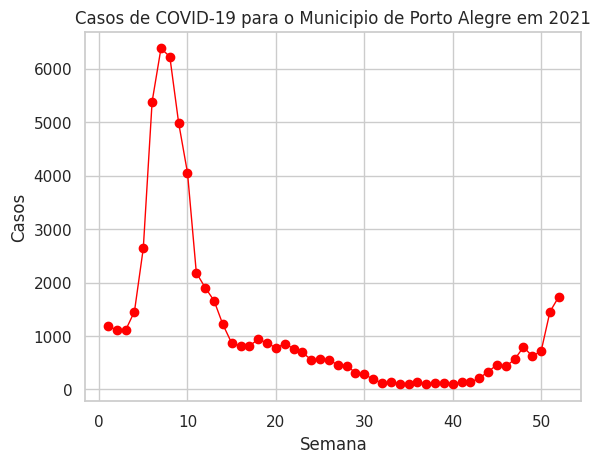

In [45]:
plt.plot(y[y['municipio']==324]['sem_not'], y[y['municipio']==324]['casos'], color='red', marker='o', linewidth=1.0)
plt.title(r'Casos de COVID-19 para o Municipio de Porto Alegre em 2021', fontsize=12)
plt.xlabel('Semana')
plt.ylabel('Casos')
plt.show()

### Gradient Boosting

In [46]:
from pycaret.regression import *

s = setup(data = X_treino, target = 'y', session_id=123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Regression
3,Original data shape,"(18054, 33)"
4,Transformed data shape,"(18054, 33)"
5,Transformed train set shape,"(12637, 33)"
6,Transformed test set shape,"(5417, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:32:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,11.8593,2284.0902,43.1753,0.9317,0.6857,0.7033,2.3990
rf,Random Forest Regressor,12.6370,2786.8147,47.5510,0.9172,0.6507,0.7093,10.3410
en,Elastic Net,15.7936,2540.1727,47.6390,0.9138,0.8766,1.1682,0.3360
lasso,Lasso Regression,15.9013,2569.0924,47.9133,0.9130,0.8789,1.1714,0.3120
br,Bayesian Ridge,16.3482,2598.6379,48.3049,0.9113,0.9052,1.2277,0.0800
llar,Lasso Least Angle Regression,15.9590,2630.1726,48.4696,0.9111,0.8737,1.1588,0.0840
lr,Linear Regression,16.4254,2608.2890,48.4060,0.9110,0.9086,1.2339,0.3330
ridge,Ridge Regression,16.4248,2608.1834,48.4050,0.9110,0.9087,1.2339,0.1200
huber,Huber Regressor,13.6445,2689.0573,48.5945,0.9105,0.6832,0.7167,0.2070
et,Extra Trees Regressor,13.3873,3116.4025,50.5776,0.9076,0.6688,0.7368,4.9170


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [55]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.6479,737.6203,27.1592,0.9403,0.6726,0.6271
1,11.9779,1656.6948,40.7025,0.9487,0.6793,0.7313
2,14.6827,6290.4590,79.3124,0.8721,0.6851,0.7053
3,10.6146,600.2948,24.5009,0.9613,0.7021,0.7443
4,11.1511,751.5168,27.4138,0.9471,0.7084,0.8062
5,12.7506,6794.6281,82.4295,0.8355,0.6650,0.6324
6,11.3450,1535.8292,39.1897,0.9411,0.7107,0.6920
7,10.9129,770.2196,27.7528,0.9634,0.6935,0.7046
8,11.7960,949.2242,30.8095,0.9518,0.6756,0.6935


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.1629,823.1390,28.6904,0.9333,0.6259,0.6089
1,13.3017,5198.1284,72.0980,0.8391,0.6347,0.6797
2,15.6359,8531.8195,92.3678,0.8266,0.6203,0.6498
3,10.7196,709.2297,26.6314,0.9543,0.6543,0.7006
4,11.4357,852.7363,29.2016,0.9400,0.6371,0.7132
5,13.1639,9519.3911,97.5674,0.7695,0.6236,0.5972
6,11.6331,1625.7668,40.3208,0.9377,0.6608,0.6554
7,10.8680,778.9634,27.9099,0.9630,0.6535,0.6709
8,12.2581,1449.8389,38.0768,0.9263,0.6144,0.6119


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


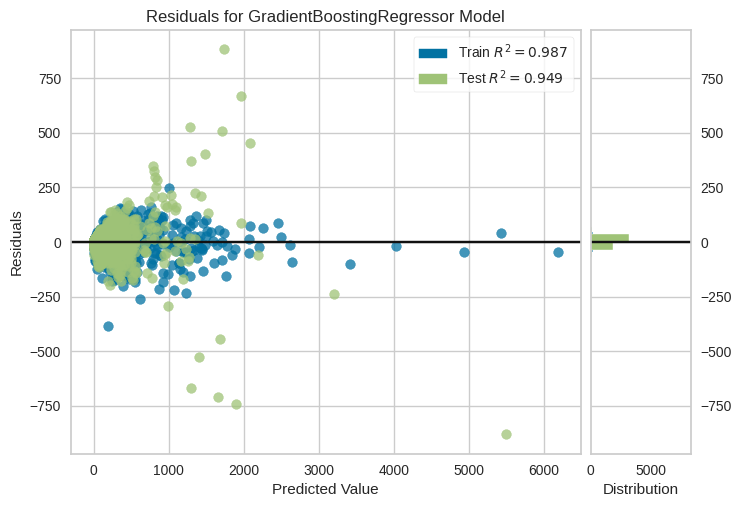

In [57]:
plot_model(tuned_gbr)

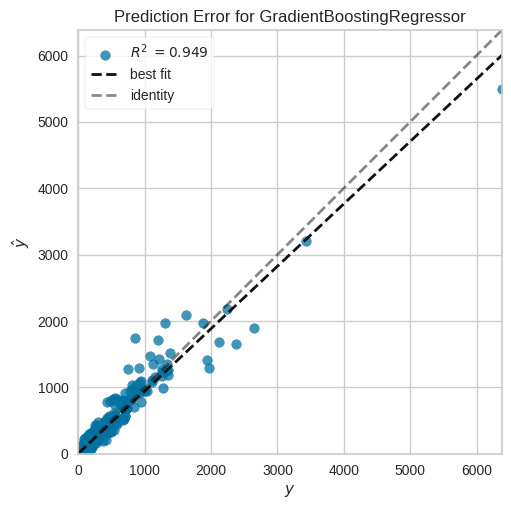

In [58]:
plot_model(tuned_gbr, plot = 'error')

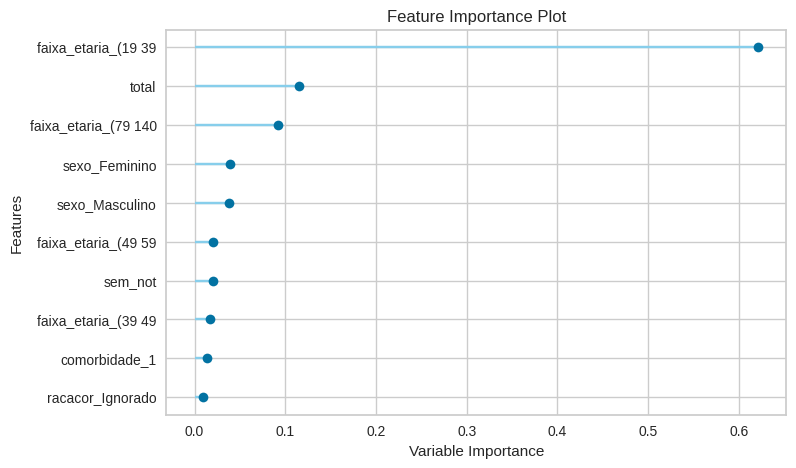

In [59]:
plot_model(tuned_gbr, plot='feature')


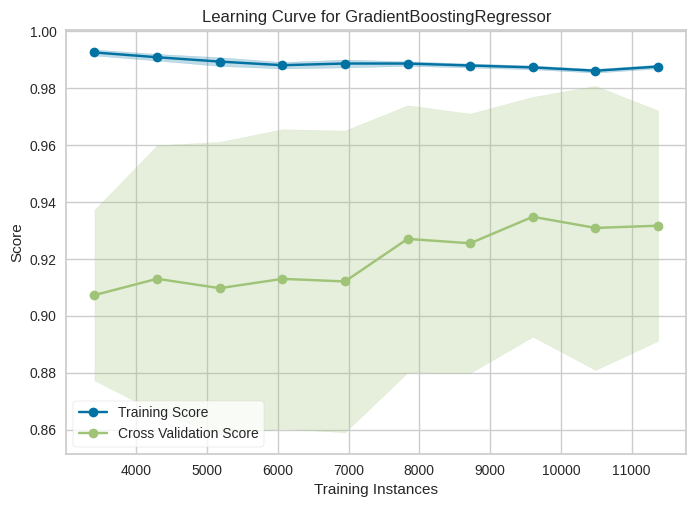

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [62]:
evaluate_model(tuned_gbr)

In [61]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,12.1797,1538.3102,39.2213,0.9491,0.6708,0.7207


,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,...,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades,y,prediction_label
2125,141,5,37.0,26.0,0.0,62.0,1.0,0.0,0.0,0.0,...,574,21.0,1516,24.0,0.0,17879,2631.0,2305,110.0,73.088315
10680,264,22,5.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,...,67,6.0,365,1.0,0.0,4044,747.0,462,8.0,5.946637
16737,369,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,430,67.0,665,0.0,0.0,3723,4519.0,745,3.0,2.296040
13751,359,28,16.0,13.0,0.0,29.0,0.0,0.0,0.0,0.0,...,240,37.0,1201,0.0,0.0,6985,1844.0,812,21.0,20.594524
5708,252,12,4.0,3.0,0.0,4.0,0.0,0.0,0.0,3.0,...,187,12.0,884,0.0,0.0,2974,1937.0,409,22.0,7.615415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,86,20,6.0,4.0,0.0,10.0,0.0,0.0,0.0,0.0,...,39,10.0,114,0.0,0.0,1147,1489.0,261,11.0,9.911257
16504,136,34,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,29,7.0,26,0.0,0.0,741,1809.0,254,2.0,1.979065
11520,112,24,16.0,15.0,0.0,31.0,0.0,0.0,0.0,0.0,...,221,20.0,1234,4.0,0.0,4034,2518.0,646,24.0,22.878967
12085,181,25,50.0,24.0,0.0,30.0,42.0,0.0,0.0,2.0,...,678,42.0,2641,9.0,0.0,29013,3260.0,3800,89.0,67.608898


In [ ]:
X_treino

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades
0,0,1,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,2303,2091,3533,338,33.0,489,1.0,0.0,1059,3335.0,496
1,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1879,1843,3085,48,6.0,344,239.0,0.0,1447,2275.0,371
2,2,1,21.0,21.0,0.0,35.0,4.0,0.0,0.0,3.0,0.0,36.0,6.0,4.0,14.0,10.0,4.0,0.0,0.0,0.0,42.0,8349,8373,14593,517,75.0,1534,3.0,0.0,6889,9833.0,1670
3,3,1,11.0,7.0,0.0,17.0,0.0,0.0,0.0,1.0,0.0,18.0,0.0,1.0,9.0,7.0,0.0,0.0,0.0,0.0,18.0,3585,3670,6229,120,10.0,868,28.0,0.0,4108,3147.0,679
4,4,1,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3512,3533,5849,104,20.0,1071,1.0,0.0,2165,4880.0,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18049,193,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3124,2919,4375,342,25.0,1292,9.0,0.0,2909,3134.0,667
18050,194,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2387,2532,4129,130,43.0,614,3.0,0.0,2911,2008.0,452
18051,195,37,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2230,2141,4089,49,9.0,224,0.0,0.0,1053,3318.0,425
18052,196,37,10.0,11.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,21.0,0.0,4.0,6.0,4.0,1.0,0.0,0.0,0.0,21.0,2290,2420,4057,71,32.0,537,13.0,0.0,2849,1861.0,457


In [ ]:
X_teste.columns

Index(['municipio', 'sem_not', 'sexo_Feminino', 'sexo_Masculino',
       'racacor_Amarela', 'racacor_Branca', 'racacor_Ignorado',
       'racacor_Indigena', 'racacor_Indígena', 'racacor_Parda',
       'racacor_Preta', 'comorbidade_0', 'comorbidade_1',
       'faixa_etaria_(-1, 19]', 'faixa_etaria_(19, 39]',
       'faixa_etaria_(39, 49]', 'faixa_etaria_(49, 59]',
       'faixa_etaria_(59, 69]', 'faixa_etaria_(69, 79]',
       'faixa_etaria_(79, 140]', 'total', 'homens', 'mulheres', 'branca',
       'preta', 'amarela', 'parda', 'indigena', 'ignorado', 'urbana', 'rural',
       'comorbidades'],
      dtype='object')

In [ ]:
# Olhando só para Porto Alegre

pred = rf.predict(X_teste[X_teste['municipio']==324])

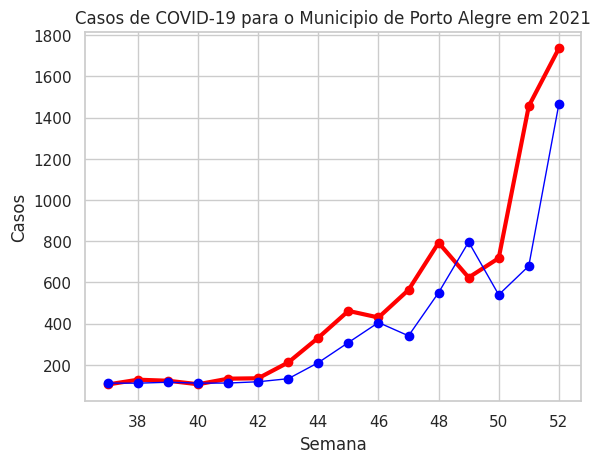

In [ ]:
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], y_teste[y_teste['municipio']==324]['casos'], color='red', marker='o', linewidth=3.0)
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], pred, color='blue', marker='o', linewidth=1.0)

plt.title(r'Casos de COVID-19 para o Municipio de Porto Alegre em 2021', fontsize=12)
plt.xlabel('Semana')
plt.ylabel('Casos')
plt.show()

# Deploy

In [ ]:
import joblib

joblib.dump(rf, 'randomforest.pkl')

['randomforest.pkl']

In [ ]:
X_teste[X_teste['sem_not']==50]

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades
24304,0,50,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2303,2091,3533,338,33.0,489,1.0,0.0,1059,3335.0,496
24305,1,50,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1879,1843,3085,48,6.0,344,239.0,0.0,1447,2275.0,371
24306,2,50,3.0,5.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,6.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8349,8373,14593,517,75.0,1534,3.0,0.0,6889,9833.0,1670
24307,3,50,11.0,4.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,13.0,2.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,15.0,3585,3670,6229,120,10.0,868,28.0,0.0,4108,3147.0,679
24308,4,50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3512,3533,5849,104,20.0,1071,1.0,0.0,2165,4880.0,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24795,491,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819,750,1449,12,4.0,104,0.0,0.0,463,1106.0,153
24796,492,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1395,1364,2507,59,14.0,177,2.0,0.0,965,1794.0,297
24797,493,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1794,1691,2768,162,37.0,517,1.0,0.0,669,2816.0,284
24798,494,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406,1387,2696,34,1.0,62,0.0,0.0,1130,1663.0,316


In [ ]:
X_teste[X_teste['sem_not']==50].to_pickle('testesite.pkl')

In [ ]:
import json

teste = json.dumps(X_teste[X_teste['sem_not']==50].iloc[0].to_dict())

# the result is a JSON string:
print(y)

{"municipio": 324.0, "sem_not": 37.0, "sexo_Feminino": 58.0, "sexo_Masculino": 76.0, "racacor_Amarela": 3.0, "racacor_Branca": 88.0, "racacor_Ignorado": 24.0, "racacor_Indigena": 0.0, "racacor_Ind\u00edgena": 0.0, "racacor_Parda": 6.0, "racacor_Preta": 13.0, "comorbidade_0": 67.0, "comorbidade_1": 67.0, "faixa_etaria_(-1, 19]": 4.0, "faixa_etaria_(19, 39]": 31.0, "faixa_etaria_(39, 49]": 23.0, "faixa_etaria_(49, 59]": 6.0, "faixa_etaria_(59, 69]": 11.0, "faixa_etaria_(69, 79]": 26.0, "faixa_etaria_(79, 140]": 15.0, "total": 134.0, "homens": 653787.0, "mulheres": 755564.0, "branca": 1116659.0, "preta": 143890.0, "amarela": 4062.0, "parda": 141411.0, "indigena": 3308.0, "ignorado": 21.0, "urbana": 1409351.0, "rural": 0.0, "comorbidades": 148547.0}


In [ ]:
y

'{"municipio": 324.0, "sem_not": 37.0, "sexo_Feminino": 58.0, "sexo_Masculino": 76.0, "racacor_Amarela": 3.0, "racacor_Branca": 88.0, "racacor_Ignorado": 24.0, "racacor_Indigena": 0.0, "racacor_Ind\\u00edgena": 0.0, "racacor_Parda": 6.0, "racacor_Preta": 13.0, "comorbidade_0": 67.0, "comorbidade_1": 67.0, "faixa_etaria_(-1, 19]": 4.0, "faixa_etaria_(19, 39]": 31.0, "faixa_etaria_(39, 49]": 23.0, "faixa_etaria_(49, 59]": 6.0, "faixa_etaria_(59, 69]": 11.0, "faixa_etaria_(69, 79]": 26.0, "faixa_etaria_(79, 140]": 15.0, "total": 134.0, "homens": 653787.0, "mulheres": 755564.0, "branca": 1116659.0, "preta": 143890.0, "amarela": 4062.0, "parda": 141411.0, "indigena": 3308.0, "ignorado": 21.0, "urbana": 1409351.0, "rural": 0.0, "comorbidades": 148547.0}'

In [ ]:
rf.predict(X_teste[X_teste['municipio']==324].iloc[0].to_frame().T)

array([119.48])

# Testes estatísticos

### ANOVA

h0 -> Que não há diferença entre a média de casos entre os municipios no RS

h1 -> Há diferença entre a média de casos entre os municipios no RS

In [ ]:
X_treino['y'] = y_treino['casos'].values

<ipython-input-73-f36e20ed6ef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_treino['y'] = y_treino['casos'].values


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('y ~ C(municipio)', data=X_treino).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

# >0.05 Não aceita a nossa H0
# <=0.05 rejeita a nossa H0, o que significa que há diferença estisticamente signitiva nos casos em cada municipio do RS

,sum_sq,df,F,PR(>F)
C(municipio),2.947610e+08,495.0,43.44005,0.0
Residual,2.406853e+08,17558.0,NaN,NaN


### T-test

In [ ]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(X_treino['urbana'].values, X_treino['rural'].values)

(27.11620406137739, 2.5742928566861642e-160, 36106.0)

### Correlações

In [ ]:
X_treino.corr()

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,...,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades,y
municipio,1.000000,-0.019845,0.007792,0.010572,0.010316,0.023859,-0.026448,-0.004482,0.013796,-0.002925,...,0.020043,0.019040,0.039683,0.024411,0.033777,0.041289,0.020128,0.017212,0.018167,0.008668
sem_not,-0.019845,1.000000,-0.125011,-0.096875,-0.028490,-0.120451,-0.084376,0.004194,-0.014711,-0.086992,...,-0.000419,-0.000545,-0.000708,-0.000552,-0.000719,-0.001202,-0.000472,0.000426,-0.000367,-0.125819
sexo_Feminino,0.007792,-0.125011,1.000000,0.830573,0.422672,0.915824,0.833051,0.022924,0.050820,0.797761,...,0.619882,0.465164,0.614153,0.621844,0.232185,0.324541,0.600610,0.327433,0.626005,0.905043
sexo_Masculino,0.010572,-0.096875,0.830573,1.000000,0.813890,0.951297,0.697268,0.027418,0.062556,0.887618,...,0.646210,0.563290,0.637047,0.644124,0.295484,0.367453,0.638874,0.210742,0.649572,0.926374
racacor_Amarela,0.010316,-0.028490,0.422672,0.813890,1.000000,0.673706,0.329447,0.028733,0.078353,0.690343,...,0.588434,0.614162,0.576002,0.583411,0.336846,0.368515,0.598299,0.026936,0.587861,0.633884
racacor_Branca,0.023859,-0.120451,0.915824,0.951297,0.673706,1.000000,0.656559,0.025561,0.054036,0.860281,...,0.651501,0.542807,0.634854,0.646323,0.278034,0.375921,0.638696,0.273613,0.652272,0.935003
racacor_Ignorado,-0.026448,-0.084376,0.833051,0.697268,0.329447,0.656559,1.000000,0.003936,0.045246,0.624824,...,0.467110,0.303119,0.486899,0.477694,0.152945,0.173763,0.449353,0.239782,0.482150,0.763035
racacor_Indigena,-0.004482,0.004194,0.022924,0.027418,0.028733,0.025561,0.003936,1.000000,0.305572,0.031900,...,0.047629,0.056222,0.045706,0.049799,0.286087,0.029908,0.049890,0.012093,0.048423,0.019490
racacor_Indígena,0.013796,-0.014711,0.050820,0.062556,0.078353,0.054036,0.045246,0.305572,1.000000,0.066400,...,0.072030,0.074378,0.073336,0.075337,0.265227,0.037630,0.073202,0.032459,0.073845,0.049436
racacor_Parda,-0.002925,-0.086992,0.797761,0.887618,0.690343,0.860281,0.624824,0.031900,0.066400,1.000000,...,0.624559,0.556453,0.619132,0.644979,0.289694,0.402695,0.619764,0.232245,0.630213,0.844848


In [ ]:
X_treino.corr(method='spearman').style.background_gradient(cmap="Blues")

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades,y
municipio,1.000000,-0.019558,0.009748,0.013661,-0.009070,0.020816,0.000249,0.005576,0.011147,-0.019826,-0.008267,0.011533,0.014004,0.000432,0.012798,0.016754,0.022851,0.020031,0.016604,0.021929,0.011444,-0.013817,-0.011518,-0.007502,-0.049102,0.026980,0.006580,-0.003716,-0.014367,-0.002236,0.034091,-0.004519,0.009283
sem_not,-0.019558,1.000000,-0.265157,-0.256865,-0.028317,-0.269993,-0.138387,0.002086,-0.017568,-0.173941,-0.120995,-0.265658,-0.225624,-0.146312,-0.236894,-0.227504,-0.207651,-0.193296,-0.171339,-0.148222,-0.270741,0.000954,0.000950,0.000828,0.001672,0.000162,0.000264,0.000880,0.000108,0.000739,-0.000179,0.000705,-0.299440
sexo_Feminino,0.009748,-0.265157,1.000000,0.914239,0.294850,0.959278,0.664349,0.052530,0.040022,0.614210,0.552268,0.974372,0.783611,0.824729,0.931563,0.890867,0.781360,0.567964,0.533606,0.476993,0.978914,0.677280,0.680079,0.681973,0.584304,0.525451,0.603853,0.463695,0.196488,0.675198,0.333198,0.685163,0.876403
sexo_Masculino,0.013661,-0.256865,0.914239,1.000000,0.293640,0.956991,0.660287,0.052132,0.040780,0.614480,0.549887,0.971429,0.778703,0.817586,0.926561,0.888770,0.786591,0.573328,0.538097,0.475208,0.975225,0.667222,0.669905,0.671334,0.572333,0.519658,0.600057,0.458454,0.196706,0.666482,0.327226,0.675390,0.875572
racacor_Amarela,-0.009070,-0.028317,0.294850,0.293640,1.000000,0.288472,0.290884,0.041093,0.051444,0.306949,0.329175,0.293728,0.297210,0.287235,0.299282,0.290160,0.287952,0.285349,0.299241,0.284671,0.295017,0.285508,0.285044,0.283898,0.276199,0.259495,0.281126,0.234779,0.264335,0.284498,0.110750,0.286870,0.285843
racacor_Branca,0.020816,-0.269993,0.959278,0.956991,0.288472,1.000000,0.584867,0.035692,0.032883,0.592532,0.532735,0.976363,0.780544,0.817712,0.927851,0.889203,0.782976,0.566448,0.533930,0.473804,0.980662,0.653634,0.656378,0.660020,0.548095,0.505873,0.585853,0.434767,0.195142,0.650555,0.343327,0.660669,0.874941
racacor_Ignorado,0.000249,-0.138387,0.664349,0.660287,0.290884,0.584867,1.000000,-0.010784,0.005154,0.465306,0.493494,0.668224,0.594874,0.593753,0.660251,0.640358,0.595104,0.492755,0.471708,0.419204,0.670673,0.607405,0.607238,0.612137,0.565857,0.502392,0.530610,0.452547,0.206298,0.608302,0.229553,0.618925,0.640333
racacor_Indigena,0.005576,0.002086,0.052530,0.052132,0.041093,0.035692,-0.010784,1.000000,0.218387,0.028695,0.016053,0.053048,0.045736,0.052599,0.055616,0.049938,0.040183,0.031005,0.039622,0.043936,0.054174,0.034590,0.035638,0.012595,0.026254,0.034412,0.035435,0.200025,0.053542,0.020678,0.041187,0.029164,0.042126
racacor_Indígena,0.011147,-0.017568,0.040022,0.040780,0.051444,0.032883,0.005154,0.218387,1.000000,0.026216,0.023371,0.039534,0.045594,0.033037,0.041397,0.036054,0.042411,0.042869,0.046363,0.054736,0.041155,0.039195,0.039320,0.030744,0.029566,0.033017,0.038610,0.084079,0.049303,0.033538,0.035102,0.038170,0.034262
racacor_Parda,-0.019826,-0.173941,0.614210,0.614480,0.306949,0.592532,0.465306,0.028695,0.026216,1.000000,0.513341,0.616522,0.578242,0.563102,0.609011,0.592155,0.552137,0.481716,0.455173,0.420887,0.622288,0.490393,0.491907,0.482959,0.472551,0.449452,0.497976,0.363485,0.215088,0.493183,0.220638,0.490736,0.583581


In [ ]:
X_treino.corr(method='kendall').style.background_gradient(cmap="Blues")

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades,y
municipio,1.000000,-0.013229,0.006619,0.009270,-0.007367,0.014022,0.000164,0.004543,0.009107,-0.015385,-0.006738,0.007795,0.009779,0.000180,0.008860,0.011805,0.016897,0.015606,0.012975,0.017331,0.007706,-0.009410,-0.007728,-0.005053,-0.033538,0.018127,0.003716,-0.004121,-0.011500,-0.001050,0.023699,-0.002552,0.006251
sem_not,-0.013229,1.000000,-0.186300,-0.181437,-0.023311,-0.188527,-0.105556,0.001721,-0.014538,-0.135541,-0.096318,-0.185250,-0.168075,-0.108394,-0.168228,-0.165226,-0.157192,-0.154758,-0.137806,-0.120066,-0.188560,0.000646,0.000643,0.000560,0.001132,0.000111,0.000179,0.000624,0.000089,0.000500,-0.000121,0.000477,-0.209014
sexo_Feminino,0.006619,-0.186300,1.000000,0.795759,0.246969,0.869753,0.547500,0.043930,0.033558,0.510829,0.461567,0.901003,0.659596,0.701313,0.828556,0.779810,0.667236,0.477856,0.448087,0.400407,0.912217,0.505628,0.508245,0.510168,0.424447,0.381075,0.441865,0.348068,0.164145,0.503564,0.238469,0.512698,0.731142
sexo_Masculino,0.009270,-0.181437,0.795759,1.000000,0.246530,0.864870,0.544984,0.043694,0.034270,0.512137,0.460444,0.894030,0.655693,0.694188,0.821912,0.777996,0.674556,0.483731,0.453046,0.399706,0.902612,0.497300,0.499796,0.501215,0.414999,0.376622,0.439324,0.344304,0.164738,0.496518,0.233978,0.504656,0.730835
racacor_Amarela,-0.007367,-0.023311,0.246969,0.246530,1.000000,0.239524,0.266547,0.040744,0.051114,0.286913,0.315236,0.243682,0.264718,0.255103,0.253580,0.251330,0.261301,0.273659,0.288673,0.277288,0.244350,0.233000,0.232617,0.231671,0.225488,0.213269,0.229457,0.200738,0.261778,0.232171,0.090406,0.234202,0.236812
racacor_Branca,0.014022,-0.188527,0.869753,0.864870,0.239524,1.000000,0.469120,0.029602,0.027337,0.486733,0.440171,0.914449,0.650015,0.686967,0.815830,0.768967,0.661816,0.471843,0.444153,0.394101,0.929849,0.479388,0.481884,0.485265,0.391218,0.362209,0.422861,0.321486,0.161642,0.476610,0.242258,0.485510,0.721623
racacor_Ignorado,0.000164,-0.105556,0.547500,0.544984,0.266547,0.469120,1.000000,-0.009861,0.004736,0.411257,0.444458,0.546473,0.510827,0.508368,0.549535,0.541826,0.520653,0.445669,0.427583,0.381779,0.547591,0.478040,0.477881,0.482291,0.440580,0.391187,0.411420,0.370773,0.188565,0.478863,0.178719,0.488401,0.518974
racacor_Indigena,0.004543,0.001721,0.043930,0.043694,0.040744,0.029602,-0.009861,1.000000,0.217821,0.026803,0.015382,0.043947,0.040674,0.046675,0.047044,0.043189,0.036415,0.029716,0.038220,0.042804,0.044801,0.028188,0.029036,0.010279,0.021419,0.028256,0.028922,0.171110,0.053133,0.016876,0.033557,0.023784,0.034850
racacor_Indígena,0.009107,-0.014538,0.033558,0.034270,0.051114,0.027337,0.004736,0.217821,1.000000,0.024553,0.022438,0.032833,0.040653,0.029386,0.035110,0.031263,0.038533,0.041183,0.044823,0.053458,0.034119,0.032024,0.032127,0.025119,0.024184,0.027183,0.031554,0.072051,0.049045,0.027403,0.028684,0.031195,0.028423
racacor_Parda,-0.015385,-0.135541,0.510829,0.512137,0.286913,0.486733,0.411257,0.026803,0.024553,1.000000,0.475293,0.507846,0.508103,0.490896,0.511403,0.506815,0.490691,0.444724,0.420698,0.391496,0.512423,0.389936,0.391246,0.383748,0.374904,0.357726,0.396373,0.299950,0.200838,0.392275,0.172559,0.390251,0.477674


# Wrapped Methods

In [ ]:
# X_treino = X_treino.drop(['y'], axis=1)

In [ ]:
X_treino.dtypes

municipio                   int64
sem_not                     Int64
sexo_Feminino             float64
sexo_Masculino            float64
racacor_Amarela           float64
racacor_Branca            float64
racacor_Ignorado          float64
racacor_Indigena          float64
racacor_Indígena          float64
racacor_Parda             float64
racacor_Preta             float64
comorbidade_0             float64
comorbidade_1             float64
faixa_etaria_(-1, 19]     float64
faixa_etaria_(19, 39]     float64
faixa_etaria_(39, 49]     float64
faixa_etaria_(49, 59]     float64
faixa_etaria_(59, 69]     float64
faixa_etaria_(69, 79]     float64
faixa_etaria_(79, 140]    float64
total                     float64
homens                      int64
mulheres                    int64
branca                      int64
preta                       int64
amarela                   float64
parda                       int64
indigena                  float64
ignorado                  float64
urbana        

In [ ]:
X_treino = X_treino.rename(columns={'faixa_etaria_(-1, 19]': 'faixa_etaria_0_19', 
                                    'faixa_etaria_(19, 39]': 'faixa_etaria_19_39',
                                    'faixa_etaria_(39, 49]': 'faixa_etaria_39_49',
                                    'faixa_etaria_(49, 59]': 'faixa_etaria_49_59',
                                    'faixa_etaria_(59, 69]': 'faixa_etaria_59_69',
                                    'faixa_etaria_(69, 79]': 'faixa_etaria_69_79',
                                    'faixa_etaria_(79, 140]': 'faixa_etaria_79_140'})


In [ ]:
X_teste = X_teste.rename(columns={'faixa_etaria_(-1, 19]': 'faixa_etaria_0_19', 
                                    'faixa_etaria_(19, 39]': 'faixa_etaria_19_39',
                                    'faixa_etaria_(39, 49]': 'faixa_etaria_39_49',
                                    'faixa_etaria_(49, 59]': 'faixa_etaria_49_59',
                                    'faixa_etaria_(59, 69]': 'faixa_etaria_59_69',
                                    'faixa_etaria_(69, 79]': 'faixa_etaria_69_79',
                                    'faixa_etaria_(79, 140]': 'faixa_etaria_79_140'})


In [ ]:
X_treino = X_treino.astype('float64')
X_teste = X_teste.astype('float64')

### Forward Selection

In [ ]:

candidates = []
ar2 = dict()
last_max = -1
y = 'y'

while(True):
    for x in X_treino.drop([y] + candidates, axis=1).columns:
        if len(candidates) == 0:
            features = x
        else:
            features = x + ' + '
            features += ' + '.join(candidates)

        model = ols(y + ' ~ ' + features, X_treino).fit()
        ar2[x] = model.rsquared

    max_ar2 =  max(ar2.values())
    max_ar2_key = max(ar2, key=ar2.get)

    if max_ar2 > last_max:
        candidates.append(max_ar2_key)
        last_max = max_ar2

        print('step: ' + str(len(candidates)))
        print(candidates)
        print('Adjusted R2: ' + str(max_ar2))
        print('===============')
    else:
        print(model.summary())
        break

print('\n\n')
print('elminated variables: ')
print(set(X_treino.drop(y, axis=1).columns).difference(candidates))

step: 1
['faixa_etaria_19_39']
Adjusted R2: 0.9239082519415556
step: 2
['faixa_etaria_19_39', 'faixa_etaria_59_69']
Adjusted R2: 0.9265612776323201
step: 3
['faixa_etaria_19_39', 'faixa_etaria_59_69', 'faixa_etaria_0_19']
Adjusted R2: 0.9279181973401294
step: 4
['faixa_etaria_19_39', 'faixa_etaria_59_69', 'faixa_etaria_0_19', 'faixa_etaria_49_59']
Adjusted R2: 0.9289690615747931
step: 5
['faixa_etaria_19_39', 'faixa_etaria_59_69', 'faixa_etaria_0_19', 'faixa_etaria_49_59', 'branca']
Adjusted R2: 0.9297178591053232
step: 6
['faixa_etaria_19_39', 'faixa_etaria_59_69', 'faixa_etaria_0_19', 'faixa_etaria_49_59', 'branca', 'total']
Adjusted R2: 0.9301743797540526
step: 7
['faixa_etaria_19_39', 'faixa_etaria_59_69', 'faixa_etaria_0_19', 'faixa_etaria_49_59', 'branca', 'total', 'sem_not']
Adjusted R2: 0.9306081718431274
step: 8
['faixa_etaria_19_39', 'faixa_etaria_59_69', 'faixa_etaria_0_19', 'faixa_etaria_49_59', 'branca', 'total', 'sem_not', 'faixa_etaria_79_140']
Adjusted R2: 0.93082110714

# Embedded Methods

In [ ]:
X_treino

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,...,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades,y
0,0.0,1.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,...,3533.0,338.0,33.0,489.0,1.0,0.0,1059.0,3335.0,496.0,1.0
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3085.0,48.0,6.0,344.0,239.0,0.0,1447.0,2275.0,371.0,6.0
2,2.0,1.0,21.0,21.0,0.0,35.0,4.0,0.0,0.0,3.0,...,14593.0,517.0,75.0,1534.0,3.0,0.0,6889.0,9833.0,1670.0,60.0
3,3.0,1.0,11.0,7.0,0.0,17.0,0.0,0.0,0.0,1.0,...,6229.0,120.0,10.0,868.0,28.0,0.0,4108.0,3147.0,679.0,20.0
4,4.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5849.0,104.0,20.0,1071.0,1.0,0.0,2165.0,4880.0,532.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18049,193.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4375.0,342.0,25.0,1292.0,9.0,0.0,2909.0,3134.0,667.0,2.0
18050,194.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4129.0,130.0,43.0,614.0,3.0,0.0,2911.0,2008.0,452.0,0.0
18051,195.0,37.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4089.0,49.0,9.0,224.0,0.0,0.0,1053.0,3318.0,425.0,0.0
18052,196.0,37.0,10.0,11.0,0.0,20.0,0.0,0.0,0.0,0.0,...,4057.0,71.0,32.0,537.0,13.0,0.0,2849.0,1861.0,457.0,25.0


### Lasso Regression

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
features = X_treino.drop(['y'], axis=1).columns

In [ ]:
pipeline = Pipeline([
                     ('model',Lasso())
                     ])

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

search.fit(X_treino.drop(['y'], axis=1),y_treino['casos'])


Fitting 5 folds for each of 99 candidates, totalling 495 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.995e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.1;, score=-9515.904 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.1;, score=-13591.898 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.1;, score=-2037.428 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.694e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.1;, score=-767.768 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.1;, score=-357.136 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.019e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.2;, score=-9508.423 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.2;, score=-13602.487 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.2;, score=-2035.020 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.2;, score=-764.502 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.765e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.2;, score=-353.616 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.041e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=0.30000000000000004;, score=-9501.224 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.30000000000000004;, score=-13611.389 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=0.30000000000000004;, score=-2032.939 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.704e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=0.30000000000000004;, score=-760.650 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=0.30000000000000004;, score=-350.372 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.060e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.4;, score=-9491.479 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.4;, score=-13620.626 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.4;, score=-2031.240 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.4;, score=-756.897 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.775e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.4;, score=-347.258 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.078e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.5;, score=-9482.411 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.5;, score=-13632.436 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.5;, score=-2029.931 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.713e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.5;, score=-753.254 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.779e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.5;, score=-344.338 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.094e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.6;, score=-9475.628 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.6;, score=-13646.396 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.6;, score=-2028.896 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.718e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.6;, score=-749.875 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.783e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.6;, score=-341.696 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.108e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=0.7000000000000001;, score=-9469.123 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=0.7000000000000001;, score=-13661.397 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=0.7000000000000001;, score=-2028.078 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.722e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=0.7000000000000001;, score=-746.982 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.787e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=0.7000000000000001;, score=-339.122 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.120e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.8;, score=-9459.072 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.8;, score=-13677.364 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.535e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.8;, score=-2027.478 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.8;, score=-744.196 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.8;, score=-336.617 total time=   2.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.130e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=0.9;, score=-9446.060 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=0.9;, score=-13700.944 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=0.9;, score=-2027.096 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=0.9;, score=-741.538 total time=   2.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=0.9;, score=-334.180 total time=   2.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.136e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=1.0;, score=-9434.386 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=1.0;, score=-13684.961 total time=   2.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=1.0;, score=-2026.932 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=1.0;, score=-738.997 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=1.0;, score=-332.109 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.144e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=1.1;, score=-9423.635 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=1.1;, score=-13671.797 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.546e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=1.1;, score=-2026.986 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=1.1;, score=-736.565 total time=   2.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=1.1;, score=-330.078 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.145e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.2000000000000002;, score=-9408.010 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.2000000000000002;, score=-13659.421 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.549e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.2000000000000002;, score=-2027.260 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.2000000000000002;, score=-734.238 total time=   2.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.2000000000000002;, score=-327.961 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.158e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.3000000000000003;, score=-9391.957 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.3000000000000003;, score=-13635.269 total time=   2.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.552e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.3000000000000003;, score=-2027.840 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.744e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.3000000000000003;, score=-732.012 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.3000000000000003;, score=-325.822 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.170e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.4000000000000001;, score=-9376.536 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.4000000000000001;, score=-13622.828 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.4000000000000001;, score=-2026.399 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.4000000000000001;, score=-730.938 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.4000000000000001;, score=-323.735 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.182e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.5000000000000002;, score=-9361.388 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.5000000000000002;, score=-13609.226 total time=   3.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.5000000000000002;, score=-2022.954 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.5000000000000002;, score=-729.723 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.5000000000000002;, score=-321.709 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.193e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=1.6;, score=-9346.471 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=1.6;, score=-13595.451 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.560e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=1.6;, score=-2019.679 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=1.6;, score=-727.785 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.818e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=1.6;, score=-319.617 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.204e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.7000000000000002;, score=-9331.731 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.7000000000000002;, score=-13575.635 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.563e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.7000000000000002;, score=-2016.643 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.7000000000000002;, score=-725.845 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.7000000000000002;, score=-317.449 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.213e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.8000000000000003;, score=-9317.685 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.8000000000000003;, score=-13550.601 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.8000000000000003;, score=-2013.817 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.759e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.8000000000000003;, score=-724.010 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.8000000000000003;, score=-315.383 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.219e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=1.9000000000000001;, score=-9312.100 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=1.9000000000000001;, score=-13525.808 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=1.9000000000000001;, score=-2011.185 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=1.9000000000000001;, score=-722.288 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=1.9000000000000001;, score=-313.401 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.225e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=2.0;, score=-9307.209 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.0;, score=-13501.302 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=2.0;, score=-2008.718 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.765e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=2.0;, score=-720.682 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=2.0;, score=-311.497 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.233e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=2.1;, score=-9302.652 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.1;, score=-13476.990 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.573e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=2.1;, score=-2006.401 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=2.1;, score=-719.154 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=2.1;, score=-309.669 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.240e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=2.2;, score=-9298.273 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.2;, score=-13453.015 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.575e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=2.2;, score=-2004.213 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.769e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=2.2;, score=-717.693 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.834e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=2.2;, score=-307.434 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.266e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.3000000000000003;, score=-9297.435 total time=   3.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.3000000000000003;, score=-13429.319 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.3000000000000003;, score=-2000.992 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.771e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.3000000000000003;, score=-716.346 total time=   3.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.3000000000000003;, score=-305.524 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.4000000000000004;, score=-9294.024 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.4000000000000004;, score=-13405.944 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.4000000000000004;, score=-1997.564 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.773e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.4000000000000004;, score=-715.278 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.4000000000000004;, score=-303.721 total time=   2.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.288e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.5000000000000004;, score=-9290.512 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.5000000000000004;, score=-13330.403 total time=   2.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.5000000000000004;, score=-1994.047 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.775e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.5000000000000004;, score=-714.525 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.5000000000000004;, score=-301.961 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.295e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=2.6;, score=-9287.434 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.6;, score=-13263.373 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=2.6;, score=-1991.206 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.777e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=2.6;, score=-713.926 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=2.6;, score=-300.239 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.303e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=2.7;, score=-9284.612 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=2.7;, score=-13204.188 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=2.7;, score=-1988.415 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.778e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=2.7;, score=-714.425 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=2.7;, score=-298.551 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.309e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.8000000000000003;, score=-9281.973 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.162e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.8000000000000003;, score=-13148.257 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.8000000000000003;, score=-1985.722 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.780e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.8000000000000003;, score=-714.857 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.8000000000000003;, score=-296.904 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.316e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.9000000000000004;, score=-9279.402 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=2.9000000000000004;, score=-13093.859 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=2.9000000000000004;, score=-1983.196 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.781e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=2.9000000000000004;, score=-715.497 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=2.9000000000000004;, score=-295.296 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.322e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.0000000000000004;, score=-9276.876 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.0000000000000004;, score=-13039.651 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.0000000000000004;, score=-1980.719 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.783e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.0000000000000004;, score=-716.148 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.849e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.0000000000000004;, score=-294.614 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.328e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=3.1;, score=-9274.401 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.168e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=3.1;, score=-12985.804 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.592e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=3.1;, score=-1978.275 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.784e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=3.1;, score=-716.797 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=3.1;, score=-294.730 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.334e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=3.2;, score=-9272.071 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=3.2;, score=-12932.524 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=3.2;, score=-1975.858 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=3.2;, score=-717.450 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.852e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=3.2;, score=-294.739 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.360e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.3000000000000003;, score=-9280.894 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.3000000000000003;, score=-12884.343 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.595e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.3000000000000003;, score=-1973.454 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.787e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.3000000000000003;, score=-718.108 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.854e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.3000000000000003;, score=-294.694 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.4000000000000004;, score=-9280.595 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.4000000000000004;, score=-12858.220 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.4000000000000004;, score=-1971.076 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.4000000000000004;, score=-718.775 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.4000000000000004;, score=-294.637 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.5000000000000004;, score=-9268.741 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.5000000000000004;, score=-12832.408 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.5000000000000004;, score=-1968.713 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.790e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.5000000000000004;, score=-719.452 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.857e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.5000000000000004;, score=-294.576 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=3.6;, score=-9255.584 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=3.6;, score=-12806.846 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=3.6;, score=-1966.371 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.792e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=3.6;, score=-720.140 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.858e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=3.6;, score=-294.514 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=3.7;, score=-9242.990 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=3.7;, score=-12804.279 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=3.7;, score=-1964.539 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=3.7;, score=-720.839 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.860e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=3.7;, score=-294.452 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.8000000000000003;, score=-9231.171 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.8000000000000003;, score=-12823.448 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.8000000000000003;, score=-1962.792 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.794e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.8000000000000003;, score=-721.553 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.861e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.8000000000000003;, score=-294.391 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=3.9000000000000004;, score=-9220.108 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=3.9000000000000004;, score=-12825.870 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.605e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=3.9000000000000004;, score=-1961.044 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.796e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.9000000000000004;, score=-722.293 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=3.9000000000000004;, score=-294.330 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.0;, score=-9209.727 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.0;, score=-12817.958 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.0;, score=-1959.342 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.0;, score=-723.066 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.864e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.0;, score=-294.269 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.1;, score=-9199.820 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.1;, score=-12799.272 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.608e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.1;, score=-1957.683 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.1;, score=-723.849 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.1;, score=-294.210 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.2;, score=-9190.393 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.2;, score=-12776.234 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.609e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.2;, score=-1956.055 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.800e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.2;, score=-723.428 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.2;, score=-294.154 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.363e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.3;, score=-9181.388 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.3;, score=-12751.125 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.3;, score=-1954.445 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.3;, score=-722.928 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.3;, score=-294.101 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.362e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=4.3999999999999995;, score=-9172.708 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=4.3999999999999995;, score=-12726.303 total time=   2.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=4.3999999999999995;, score=-1952.867 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=4.3999999999999995;, score=-722.432 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=4.3999999999999995;, score=-294.049 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.361e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.5;, score=-9164.291 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.5;, score=-12701.970 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.614e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.5;, score=-1951.305 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.803e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.5;, score=-721.934 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.5;, score=-294.002 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.359e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.6;, score=-9156.155 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.6;, score=-12677.868 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.6;, score=-1949.772 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.6;, score=-721.439 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.6;, score=-293.958 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.357e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.7;, score=-9148.357 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.7;, score=-12653.975 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.616e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.7;, score=-1948.258 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.7;, score=-720.948 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.7;, score=-293.917 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.353e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.8;, score=-9140.825 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.8;, score=-12630.375 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.618e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.8;, score=-1946.777 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.807e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.8;, score=-719.425 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.875e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.8;, score=-293.877 total time=   2.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.348e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=4.9;, score=-9133.623 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=4.9;, score=-12607.090 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=4.9;, score=-1945.323 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.808e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=4.9;, score=-719.110 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.876e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=4.9;, score=-293.839 total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.342e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.0;, score=-9126.807 total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.0;, score=-12584.075 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.620e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.0;, score=-1943.891 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.0;, score=-719.973 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.0;, score=-293.801 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.337e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.1;, score=-9120.362 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.1;, score=-12561.358 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.622e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.1;, score=-1942.481 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.810e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.1;, score=-721.030 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.1;, score=-293.770 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.323e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.2;, score=-9114.406 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.2;, score=-12538.882 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.623e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.2;, score=-1941.088 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.2;, score=-722.048 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.2;, score=-293.736 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.311e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.3;, score=-9110.069 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.3;, score=-12516.679 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.624e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.3;, score=-1939.710 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.813e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.3;, score=-722.960 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.881e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.3;, score=-293.698 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.302e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.4;, score=-9106.349 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.4;, score=-12494.703 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.4;, score=-1938.342 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.4;, score=-723.785 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.4;, score=-293.658 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.295e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.5;, score=-9103.051 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.5;, score=-12472.924 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.626e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.5;, score=-1936.985 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.5;, score=-724.508 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.5;, score=-293.612 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.289e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.6;, score=-9100.101 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.6;, score=-12451.359 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.6;, score=-1935.635 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.6;, score=-725.155 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.6;, score=-293.592 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.284e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.7;, score=-9097.480 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.212e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.7;, score=-12430.003 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.629e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.7;, score=-1934.291 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.817e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.7;, score=-725.737 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.7;, score=-293.500 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.8;, score=-9095.331 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.8;, score=-12410.435 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.630e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.8;, score=-1932.951 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.818e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.8;, score=-726.241 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.8;, score=-293.410 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.270e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=5.9;, score=-9093.605 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=5.9;, score=-12394.530 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.631e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=5.9;, score=-1927.839 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.819e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=5.9;, score=-726.688 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=5.9;, score=-293.323 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.260e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.0;, score=-9092.060 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.0;, score=-12378.742 total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.0;, score=-1923.623 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.0;, score=-727.096 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.889e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.0;, score=-293.237 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.251e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.1;, score=-9090.644 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.1;, score=-12363.185 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.633e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.1;, score=-1921.086 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.1;, score=-727.450 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.1;, score=-293.157 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.304e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.2;, score=-9096.268 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.2;, score=-12347.822 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.2;, score=-1918.918 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.2;, score=-727.750 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.2;, score=-292.683 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.241e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.3;, score=-9095.052 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.3;, score=-12332.677 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.3;, score=-1916.659 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.3;, score=-728.006 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.891e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.3;, score=-291.461 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.211e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.4;, score=-9096.233 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.4;, score=-12317.730 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.4;, score=-1914.184 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.4;, score=-728.238 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.4;, score=-291.105 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.5;, score=-9096.445 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.5;, score=-12302.977 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.638e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.5;, score=-1911.504 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.5;, score=-728.435 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.893e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.5;, score=-291.012 total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.176e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.6;, score=-9095.605 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.6;, score=-12288.308 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.639e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.6;, score=-1908.880 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.6;, score=-728.605 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.6;, score=-290.973 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.162e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.7;, score=-9094.295 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.7;, score=-12273.664 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.640e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.7;, score=-1906.383 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.7;, score=-728.754 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.7;, score=-290.844 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.150e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.8;, score=-9092.808 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.8;, score=-12259.111 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.641e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.8;, score=-1904.096 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.8;, score=-728.876 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.8;, score=-290.779 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.139e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=6.9;, score=-9091.279 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=6.9;, score=-12244.712 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.642e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=6.9;, score=-1902.045 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=6.9;, score=-728.991 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=6.9;, score=-290.786 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.129e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.0;, score=-9089.787 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.0;, score=-12230.498 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.643e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.0;, score=-1900.151 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.0;, score=-729.092 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.0;, score=-290.821 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.118e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.1;, score=-9088.332 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.1;, score=-12216.355 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.1;, score=-1898.267 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.1;, score=-729.172 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.899e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.1;, score=-290.871 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.108e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.2;, score=-9086.912 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.2;, score=-12202.446 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.645e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.2;, score=-1896.411 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.2;, score=-729.248 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.2;, score=-290.923 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.097e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.3;, score=-9085.502 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.3;, score=-12188.561 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.646e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.3;, score=-1894.646 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.3;, score=-729.317 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.901e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.3;, score=-290.979 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.086e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.4;, score=-9084.088 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.4;, score=-12174.902 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.4;, score=-1892.862 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.834e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.4;, score=-729.368 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.902e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.4;, score=-291.038 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.072e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.5;, score=-9082.548 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.5;, score=-12161.301 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.5;, score=-1891.135 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.5;, score=-729.416 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.903e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.5;, score=-291.096 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.057e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.6;, score=-9080.765 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.6;, score=-12147.920 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.6;, score=-1889.508 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.6;, score=-729.460 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.6;, score=-291.154 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.038e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.7;, score=-9078.811 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.7;, score=-12134.579 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.650e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.7;, score=-1887.904 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.7;, score=-729.495 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.7;, score=-291.213 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.019e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.8;, score=-9078.726 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.8;, score=-12121.452 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.8;, score=-1886.375 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.8;, score=-729.528 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.905e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.8;, score=-291.275 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.010e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=7.9;, score=-9082.340 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=7.9;, score=-12108.375 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=7.9;, score=-1884.901 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=7.9;, score=-729.560 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=7.9;, score=-291.344 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.002e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.0;, score=-9085.972 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.0;, score=-12095.490 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.0;, score=-1883.463 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.0;, score=-729.584 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.907e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.0;, score=-291.418 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.992e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.1;, score=-9089.624 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.1;, score=-12082.681 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.653e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.1;, score=-1882.113 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.1;, score=-729.608 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.1;, score=-291.496 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.983e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.2;, score=-9093.267 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.2;, score=-12069.981 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.2;, score=-1879.700 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.2;, score=-729.635 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.2;, score=-291.576 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.973e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.3;, score=-9096.902 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.240e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.3;, score=-12057.477 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.3;, score=-1876.844 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.841e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.3;, score=-729.654 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.3;, score=-291.658 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.963e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.4;, score=-9100.510 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.241e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.4;, score=-12045.072 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.4;, score=-1874.793 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.4;, score=-729.673 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.910e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.4;, score=-291.742 total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.949e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.5;, score=-9103.988 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.5;, score=-12032.774 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.656e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.5;, score=-1872.028 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.843e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.5;, score=-729.695 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.5;, score=-291.826 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.933e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.6;, score=-9107.269 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.6;, score=-12020.657 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.656e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.6;, score=-1869.313 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.843e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.6;, score=-729.713 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.6;, score=-291.910 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.913e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.7;, score=-9110.217 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.7;, score=-12008.593 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.7;, score=-1866.424 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.7;, score=-729.732 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.7;, score=-291.998 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.890e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.8;, score=-9112.151 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.8;, score=-11996.724 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.8;, score=-1863.921 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.845e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.8;, score=-729.752 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.8;, score=-292.087 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.883e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=8.9;, score=-9112.551 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=8.9;, score=-11984.961 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=8.9;, score=-1861.956 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=8.9;, score=-729.772 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.914e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=8.9;, score=-292.176 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.875e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.0;, score=-9112.943 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.0;, score=-11973.262 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.0;, score=-1860.510 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.0;, score=-729.792 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.915e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.0;, score=-292.269 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.869e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.1;, score=-9113.323 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.1;, score=-11961.724 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.1;, score=-1859.401 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.1;, score=-729.813 total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.915e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.1;, score=-292.365 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.861e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.2;, score=-9113.719 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.2;, score=-11950.324 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.2;, score=-1858.629 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.2;, score=-729.834 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.2;, score=-292.461 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.855e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.3;, score=-9114.113 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.3;, score=-11939.055 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.3;, score=-1858.019 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.3;, score=-729.861 total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.3;, score=-292.560 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.848e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.4;, score=-9114.520 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.4;, score=-11927.981 total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.4;, score=-1857.485 total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.849e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.4;, score=-729.882 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.4;, score=-292.662 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.841e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.5;, score=-9114.920 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.5;, score=-11916.499 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.5;, score=-1856.996 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.5;, score=-729.915 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.5;, score=-292.762 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.832e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.6;, score=-9115.650 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.6;, score=-11906.661 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.6;, score=-1856.536 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.6;, score=-730.332 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.6;, score=-292.869 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.824e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=9.700000000000001;, score=-9116.689 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END model__alpha=9.700000000000001;, score=-11897.470 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END model__alpha=9.700000000000001;, score=-1856.074 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END .model__alpha=9.700000000000001;, score=-729.424 total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END .model__alpha=9.700000000000001;, score=-292.975 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.817e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.8;, score=-9117.757 total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.8;, score=-11888.769 total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.8;, score=-1855.639 total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.8;, score=-727.690 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.8;, score=-293.086 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.808e+06, tolerance: 3.181e+04
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ..............model__alpha=9.9;, score=-9118.853 total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+07, tolerance: 3.427e+04
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END .............model__alpha=9.9;, score=-11880.329 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+07, tolerance: 4.445e+04
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ..............model__alpha=9.9;, score=-1855.185 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+07, tolerance: 5.128e+04
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ...............model__alpha=9.9;, score=-726.359 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+07, tolerance: 5.213e+04
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ...............model__alpha=9.9;, score=-293.056 total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.972e+07, tolerance: 5.354e+04
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_estimator_

Pipeline(steps=[('model', Lasso(alpha=9.9))])

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

print(coefficients)

[-9.20719858e-04 -3.06029187e-01 -3.68314428e-02  1.55415746e-01
 -0.00000000e+00  1.77701127e-01  2.09382723e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  4.06362769e-02
  3.84727857e-01 -1.05487241e+00  2.46659229e+00  0.00000000e+00
  1.21643425e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.64665920e-01  9.72082494e-04 -1.75422581e-04  6.39462039e-05
 -9.05636303e-04  4.35334820e-03  5.36285747e-04 -9.73395752e-04
 -0.00000000e+00  5.02145897e-06  4.72611000e-04 -2.74833742e-03]


In [ ]:
importance = np.abs(coefficients)
print(importance)

[9.20719858e-04 3.06029187e-01 3.68314428e-02 1.55415746e-01
 0.00000000e+00 1.77701127e-01 2.09382723e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.06362769e-02
 3.84727857e-01 1.05487241e+00 2.46659229e+00 0.00000000e+00
 1.21643425e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.64665920e-01 9.72082494e-04 1.75422581e-04 6.39462039e-05
 9.05636303e-04 4.35334820e-03 5.36285747e-04 9.73395752e-04
 0.00000000e+00 5.02145897e-06 4.72611000e-04 2.74833742e-03]


In [ ]:
np.array(features)[importance == 0]

array(['racacor_Amarela', 'racacor_Indigena', 'racacor_Indígena',
       'racacor_Parda', 'racacor_Preta', 'faixa_etaria_39_49',
       'faixa_etaria_59_69', 'faixa_etaria_69_79', 'faixa_etaria_79_140',
       'ignorado'], dtype=object)

# Advanced Methods

### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time

pca=PCA(n_components=2)
PC=pca.fit_transform(X_treino.drop(['y'], axis=1))
principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2'])
finalDf = pd.concat([principalDF, X_treino[['y']]], axis = 1)
finalDf.head()

CPU times: user 172 ms, sys: 170 ms, total: 341 ms
Wall time: 398 ms


,pc1,pc2,y
0,-25675.442791,-156.190944,1.0
1,-25926.620825,-1299.133494,6.0
2,-11289.604865,7984.347378,60.0
3,-21140.365192,-126.120076,20.0
4,-22718.675425,1771.724655,6.0


In [ ]:
finalTeste = pca.transform(X_teste)
finalTeste=pd.DataFrame(data=finalTeste,columns=['pc1','pc2'])

finalTeste.head()

,pc1,pc2
0,-25003.621130,-1984.181247
1,-3553.123347,1307.799596
2,16921.096844,-968.744416
3,82611.661125,6138.978726
4,-25084.636910,-1742.248711


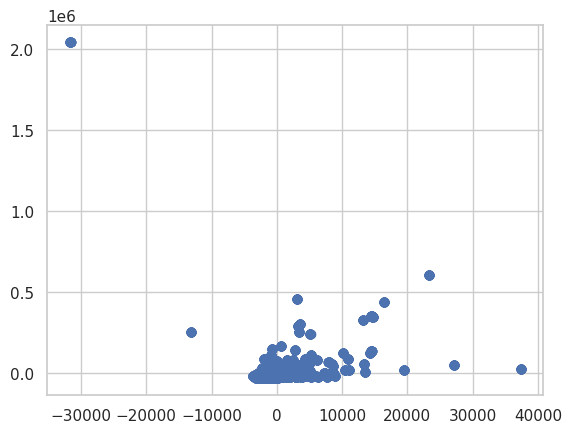

In [ ]:
plt.scatter(finalDf['pc2'], finalDf['pc1'], marker='o')

In [ ]:
%%time

logistic=LogisticRegression()
logistic.fit(X=X_treino.drop(['y'],axis=1),y=X_treino['y'])
logistic.predict(X_teste)
score_2=logistic.score(X_teste,y_teste['casos'])

CPU times: user 54.9 s, sys: 28.7 s, total: 1min 23s
Wall time: 1min 5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(score_2)

0.19772551046782114


In [ ]:
%%time

logistic=LogisticRegression()
logistic.fit(X=finalDf.drop(['y'],axis=1),y=finalDf['y'])
logistic.predict(finalTeste)
score_2=logistic.score(finalTeste,y_teste['casos'])

CPU times: user 44.6 s, sys: 22.3 s, total: 1min 6s
Wall time: 49.9 s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_treino.shape

(18054, 33)

In [ ]:
print(score_2)

0.22525200310157664


In [ ]:
66/83

0.7951807228915663

### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_treino.drop(['y'], axis=1), X_treino['y'])

In [ ]:
X_teste_lda = lda.transform(X_teste)

<ipython-input-113-db4e5a899fb9>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


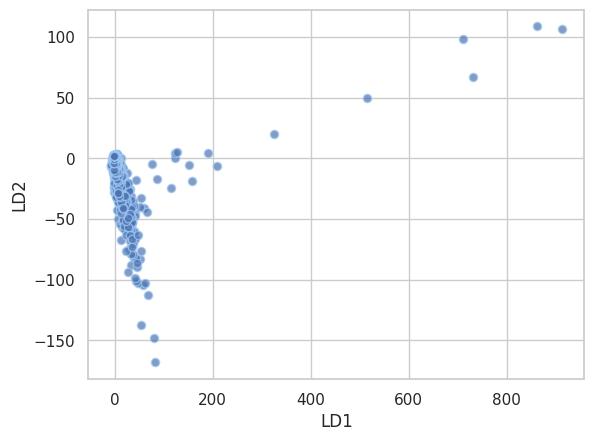

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
%%time

logistic=LogisticRegression()
logistic.fit(X=X_lda,y=y_treino['casos'])
logistic.predict(X_teste_lda)
score_2=logistic.score(X_teste_lda,y_teste['casos'])

CPU times: user 50 s, sys: 27.5 s, total: 1min 17s
Wall time: 53.6 s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(score_2)

0.23959679503747738


In [ ]:
77/83

0.927710843373494